In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d


In [3]:
# funkce na pravé straně rovnice vedení tepla (vnější síly)
def f_fce(t):
    return 0
    
# okrajové podmínky
def g_fce(t):
    return 0

#vytvoří vektor a matici u0 (počáteční podmínky)
def create_u0(h,r):
    u0 = np.zeros([h,h])
    for i in range(h):
        for j in range(h):
            circle = (j-h/2)**2+(i-h/2)**2
            if circle<=r:
                u0[i][j]=1
    matrix = u0
    vector = np.reshape(u0,h**2)
    return [matrix,vector]
    
# popis rovnice vedení tepla ve 2D
def Rovnice_vedeni_tepla_2D(t,u):
    du = np.zeros(len(u))
    h = int(np.sqrt(len(u)))
    for i in range(0,h):
        du[i] = g_fce(t)
    for i in range(h,h**2-h):
        if i%h==0:
            du[i] = g_fce(t)
        elif i%h==h-1:
            du[i] = g_fce(t)
        else:
            du[i] = -4*u[i]+u[i-1]+u[i+1]+u[i-h]+u[i+h]+f_fce(t)
    for i in range(h**2-h,h**2):
        du[i] = g_fce(t)
    return du

def RUNGE_KUTTA(t_start,t_end,sample_step,int_step,x_ini,function):
    stepcount = 0
    t = t_start
    t_int = t_start
    x = np.array(x_ini)
    result = []
    while(t<t_end):
        result.append([t,x])
        t = t + min(sample_step,t_end-t)
        while(t_int<t):
            t_int = t_int + min(int_step,t-t_int)
            k1 = int_step * function(t,x)
            k2 = int_step * function(t + 1/3 * int_step, x + 1/3 * k1)
            k3 = int_step * function(t + 1/3 * int_step, x + 1/6 * k1 + 1/6 * k2)
            k4 = int_step * function(t + 1/2 * int_step, x + 1/8 * k1 + 3/8 * k3)
            k5 = int_step * function(t + 1 * int_step, x + 1/2 * k1 - 3/2 * k3 + 2*k4)
            x = x + 1/6 * (k1 + 4 * k4 + k5)
            stepcount += 1
    return [result,stepcount]

def vector_to_matrix(u):
    u = np.reshape(u,(int(np.sqrt(len(u))),int(np.sqrt(len(u)))))
    return u

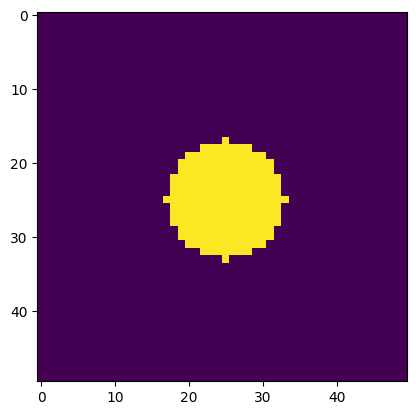

In [4]:
u0=create_u0(50,64) #počateční stav
plt.imshow(u0[0])
plt.show()


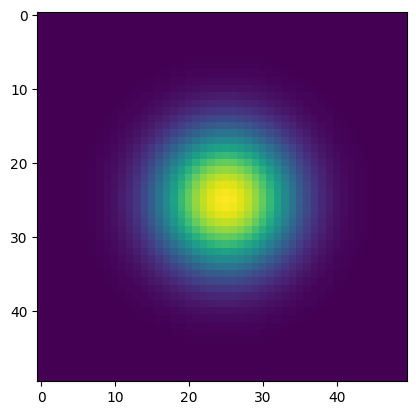

In [5]:
u0=create_u0(50,64)
A = RUNGE_KUTTA(0,10,0.2,1e-2,u0[1],Rovnice_vedeni_tepla_2D)
plt.imshow(vector_to_matrix(A[0][50][1]))

In [7]:
import matplotlib.animation as animation


fps = 20
nSeconds = 10
fig = plt.figure( figsize=(8,8) )
a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )
    if i < 50:
        im.set_array(vector_to_matrix(A[0][0][1]))
    else:
        im.set_array(vector_to_matrix(A[0][i-49][1]))
    return [im]
    
anim = animation.FuncAnimation(
                            fig,
                            animate_func,
                            frames = nSeconds * fps,
                            interval = 1000 / fps, # in ms
)
anim.save('test_anim2.gif', fps=fps, extra_args=['-vcodec', 'libx264'])

NameError: name 'snapshots' is not defined

<Figure size 800x800 with 0 Axes>

In [8]:
from PIL import Image
fname = 'motyl.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
fig = plt.figure( figsize=(8,8) )
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\barrf\\Documents\\GitHub-repos\\3fid-numerical-methods\\motyl.jpg'

In [9]:
shape = 100 #z z obrazku 1000 x 1000 udeláme 100x100
image = image.resize((shape,shape))
arr = np.asarray(image)
fig = plt.figure( figsize=(8,8) )
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()


NameError: name 'image' is not defined